# Exploratory Data Analysis - Ames Housing Dataset

This notebook performs a comprehensive exploratory data analysis on the Ames Housing training dataset.

## Contents:
1. Data Loading and Initial Exploration
2. Missing Values Analysis
3. Target Variable Analysis
4. Numerical Features Analysis
5. Categorical Features Analysis
6. Feature Distributions
7. Outlier Analysis
8. Year-based Analysis

## 1. Data Loading and Initial Exploration

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for visualizations
plt.style.use('seaborn')
sns.set_palette('husl')

C:\Users\46791130\AppData\Local\Temp\ipykernel_24512\1683314364.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
# Load the training data
df = pd.read_csv('data/ames_housing_train.csv')
print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Get basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64 

In [5]:
# Get summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Missing Values Analysis

Features with missing values:
              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
MasVnrType                 8    0.547945
Electrical                 1    0.068493


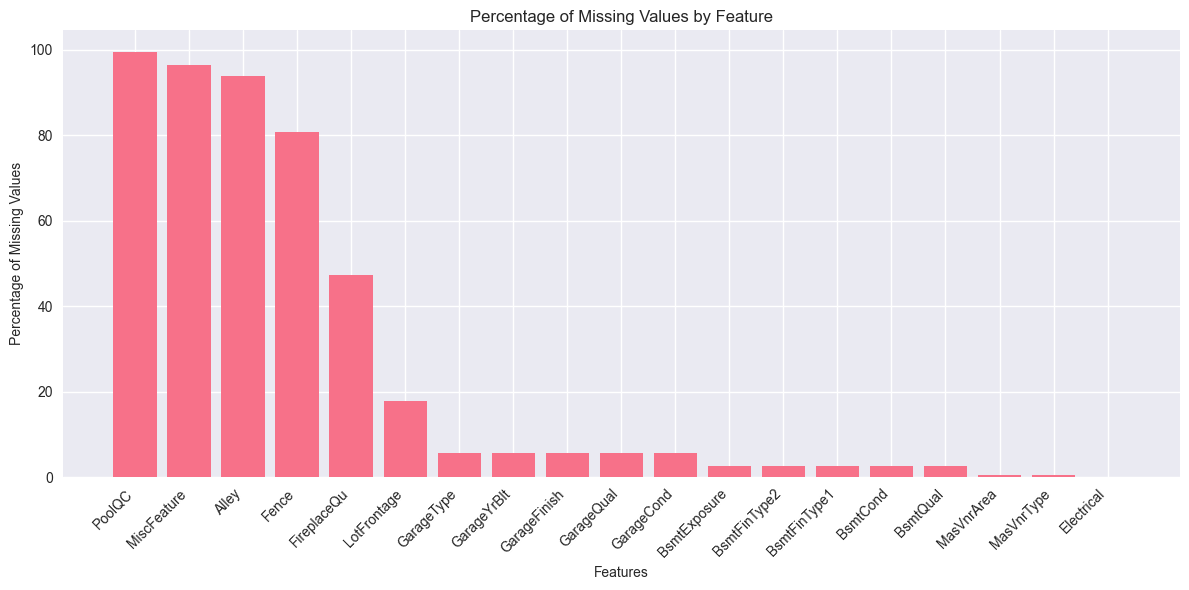

In [6]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Calculate percentage of missing values
missing_percent = (missing_values / len(df)) * 100

# Create a DataFrame with missing value information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

print("Features with missing values:")
print(missing_info)

# Visualize missing values
if len(missing_values) > 0:
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(missing_values)), missing_percent)
    plt.xticks(range(len(missing_values)), missing_values.index, rotation=45, ha='right')
    plt.title('Percentage of Missing Values by Feature')
    plt.xlabel('Features')
    plt.ylabel('Percentage of Missing Values')
    plt.tight_layout()
    plt.show()

## 3. Target Variable Analysis

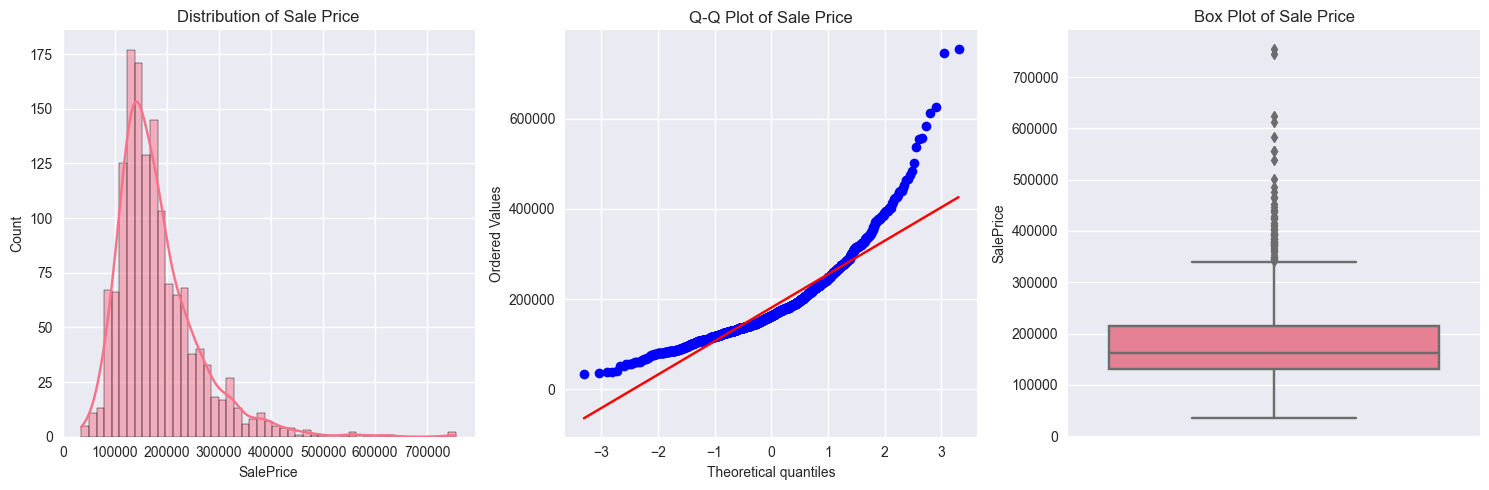


Sale Price Summary Statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.88
Kurtosis: 6.54


In [7]:
# Analyze the target variable (SalePrice)
plt.figure(figsize=(15, 5))

# Distribution plot
plt.subplot(1, 3, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')

# Q-Q plot
plt.subplot(1, 3, 2)
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sale Price')

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['SalePrice'])
plt.title('Box Plot of Sale Price')

plt.tight_layout()
plt.show()

# Print summary statistics and skewness
print("\nSale Price Summary Statistics:")
print(df['SalePrice'].describe())
print(f"\nSkewness: {df['SalePrice'].skew():.2f}")
print(f"Kurtosis: {df['SalePrice'].kurtosis():.2f}")

## 4. Numerical Features Analysis

Top 10 features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


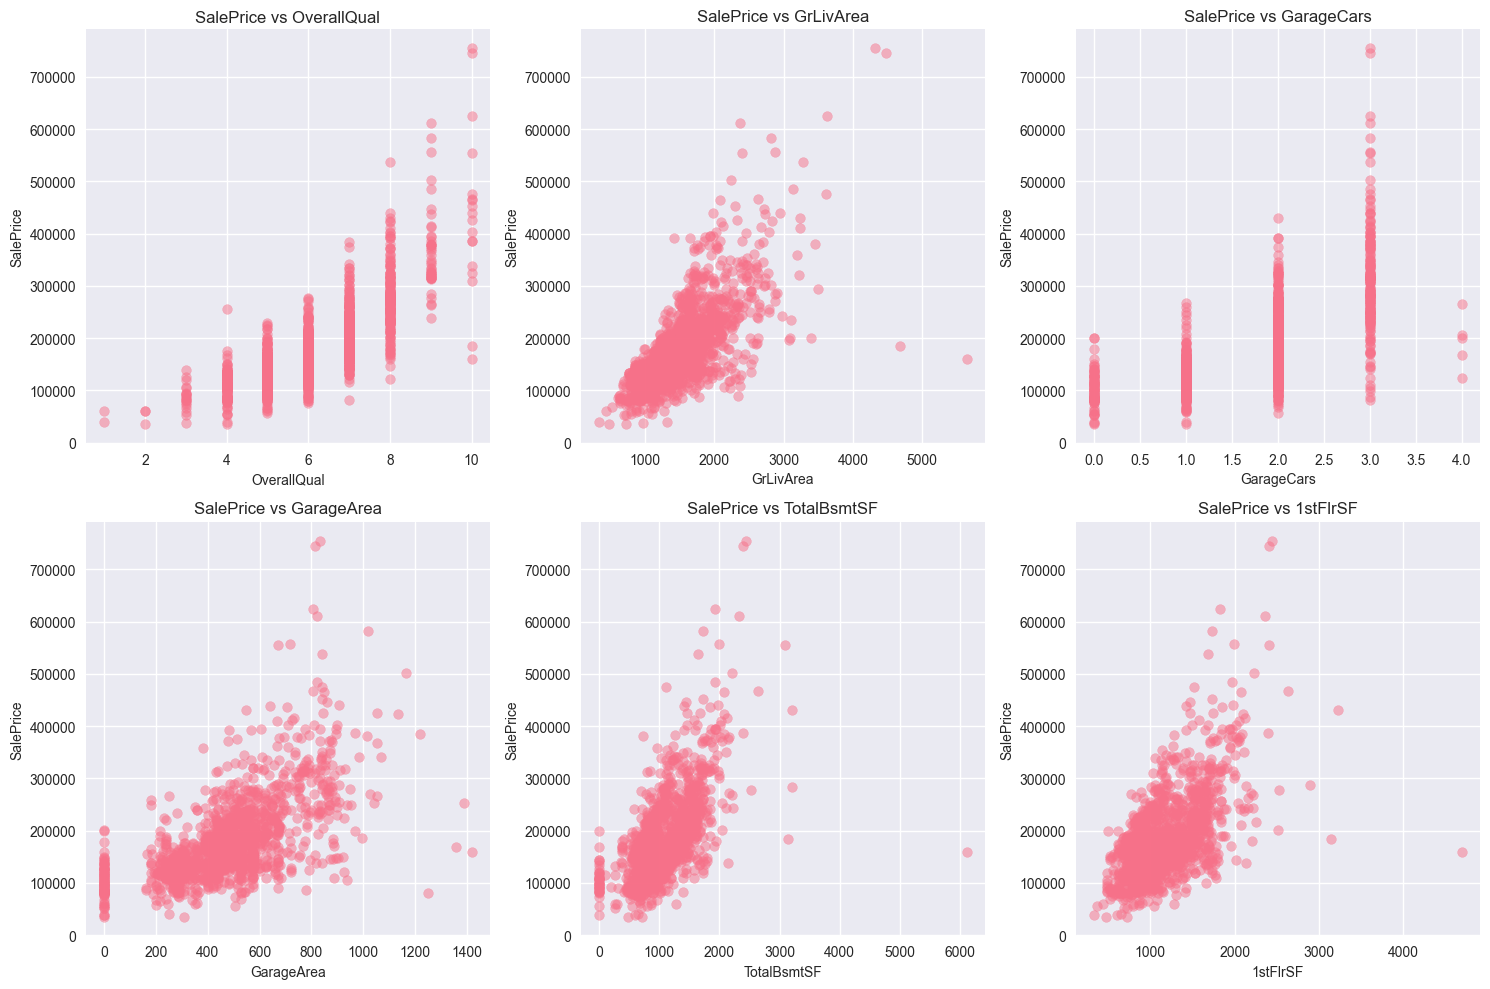

In [8]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Calculate correlations with SalePrice
correlations = df[numerical_cols].corr()['SalePrice'].sort_values(ascending=False)

print("Top 10 features correlated with SalePrice:")
print(correlations[:11])  # 11 because SalePrice will be included

# Create scatter plots for top 6 correlated numerical features
plt.figure(figsize=(15, 10))
top_6_features = correlations[1:7].index  # Exclude SalePrice itself

for i, feature in enumerate(top_6_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df['SalePrice'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'SalePrice vs {feature}')
plt.tight_layout()
plt.show()

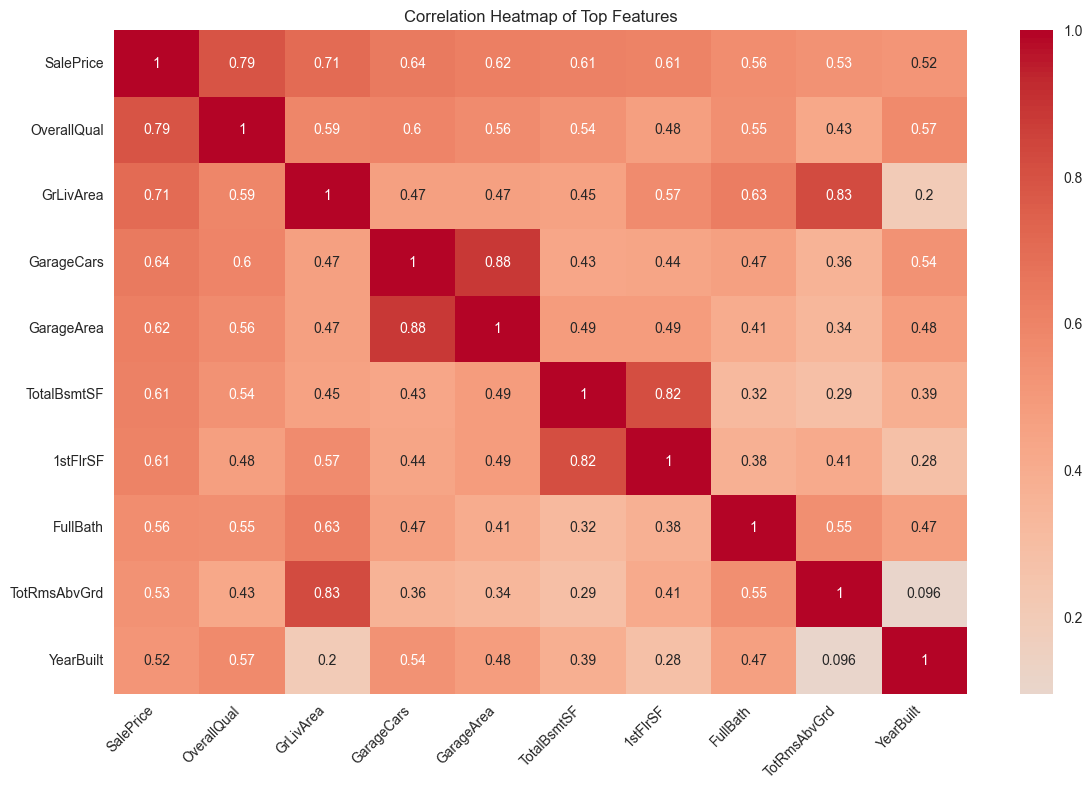

In [9]:
# Create correlation heatmap for top correlated features
plt.figure(figsize=(12, 8))
top_corr_features = correlations[:10].index
correlation_matrix = df[top_corr_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 5. Categorical Features Analysis

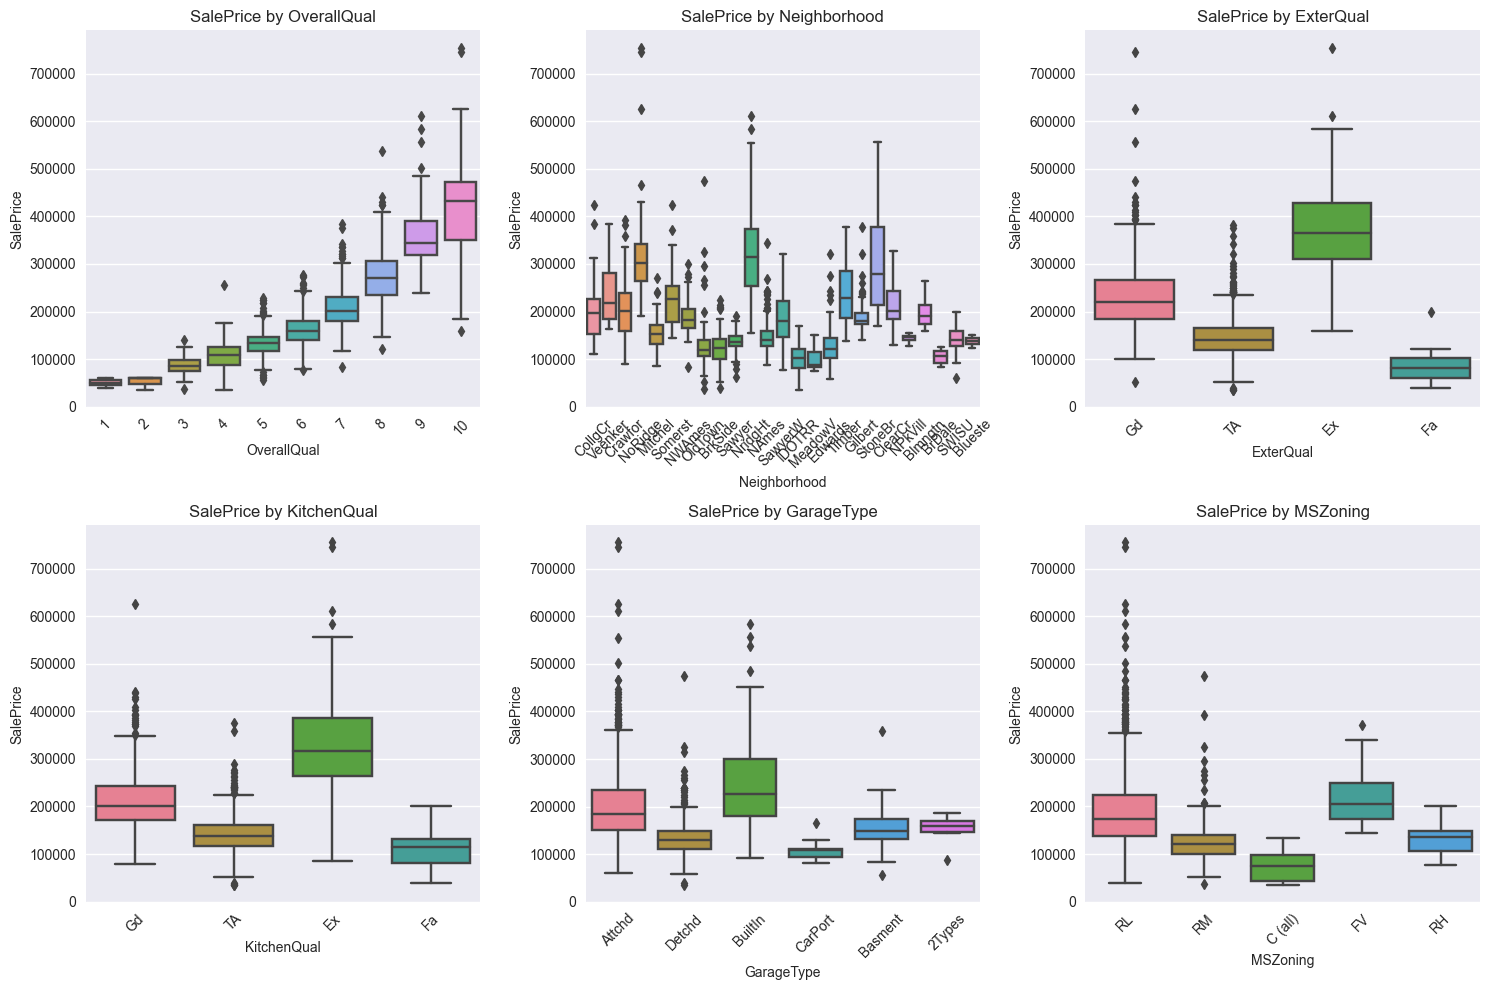


Value counts for important categorical features:

OverallQual:
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

ExterQual:
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

KitchenQual:
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

GarageType:
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (a

In [10]:
# Select important categorical features
important_cats = ['OverallQual', 'Neighborhood', 'ExterQual', 'KitchenQual', 'GarageType', 'MSZoning']
important_cats = [col for col in important_cats if col in df.columns]

# Create box plots for categorical features vs SalePrice
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_cats[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col, y='SalePrice')
    plt.xticks(rotation=45)
    plt.title(f'SalePrice by {col}')
plt.tight_layout()
plt.show()

# Print value counts for categorical features
print("\nValue counts for important categorical features:")
for col in important_cats:
    print(f"\n{col}:")
    print(df[col].value_counts())

## 6. Feature Distributions

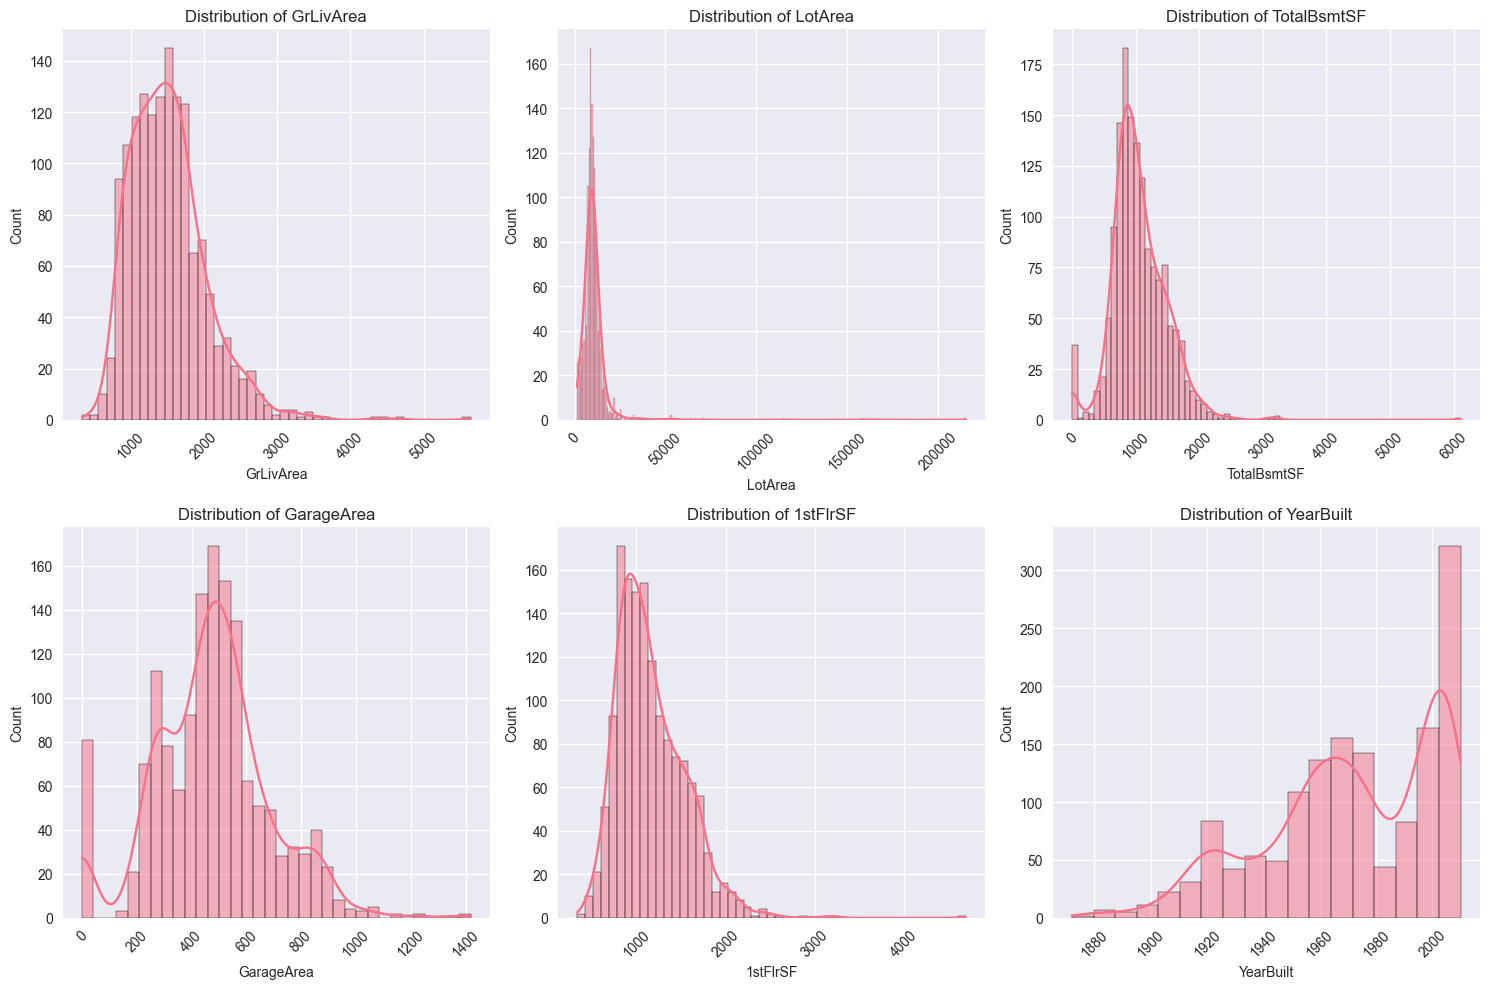


Summary statistics for key numerical features:
         GrLivArea        LotArea  TotalBsmtSF   GarageArea     1stFlrSF  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean   1515.463699   10516.828082  1057.429452   472.980137  1162.626712   
std     525.480383    9981.264932   438.705324   213.804841   386.587738   
min     334.000000    1300.000000     0.000000     0.000000   334.000000   
25%    1129.500000    7553.500000   795.750000   334.500000   882.000000   
50%    1464.000000    9478.500000   991.500000   480.000000  1087.000000   
75%    1776.750000   11601.500000  1298.250000   576.000000  1391.250000   
max    5642.000000  215245.000000  6110.000000  1418.000000  4692.000000   

         YearBuilt  
count  1460.000000  
mean   1971.267808  
std      30.202904  
min    1872.000000  
25%    1954.000000  
50%    1973.000000  
75%    2000.000000  
max    2010.000000  


In [11]:
# Select numerical features for distribution analysis
num_features = ['GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'YearBuilt']
num_features = [col for col in num_features if col in df.columns]

# Create distribution plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary statistics for key numerical features:")
print(df[num_features].describe())

## 7. Outlier Analysis

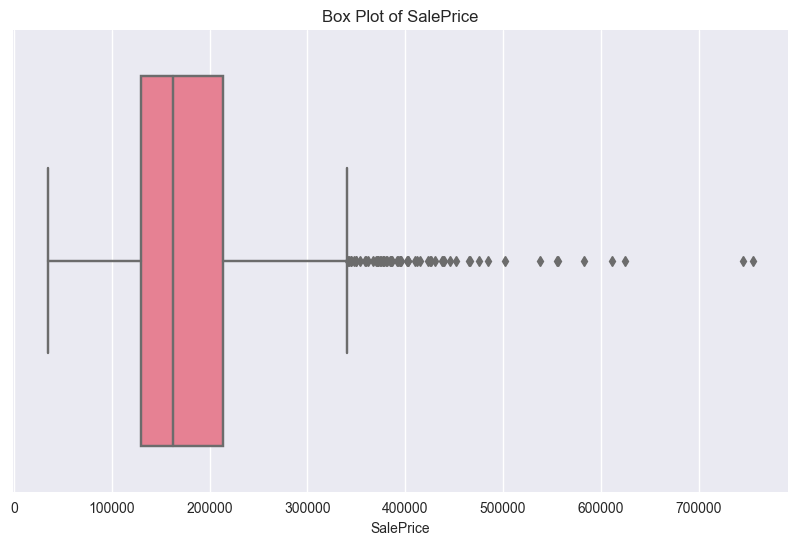


Outlier Analysis for SalePrice:
Number of outliers: 61
Percentage of outliers: 4.18%
Outlier boundaries: [3937.50, 340037.50]

Outlier values:
691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
1243    465000
591     451950
527     446261
473     440000
58      438780
349     437154
496     430000
389     426000
1142    424870
664     423000
278     415298
161     412500
1353    410000
231     403000
515     402861
661     402000
987     395192
774     395000
1437    394617
378     394432
1181    392500
688     392000
224     386250
825     385000
53      385000
112     383970
1268    381000
477     380000
1267    378500
1388    377500
336     377426
313     375000
481     374000
678     372500
151     372402
644     370878
585     369900
1228    367294
702     361919
309     360000
608     359100
321     354000
877     350000
654     350000
990     348000
6

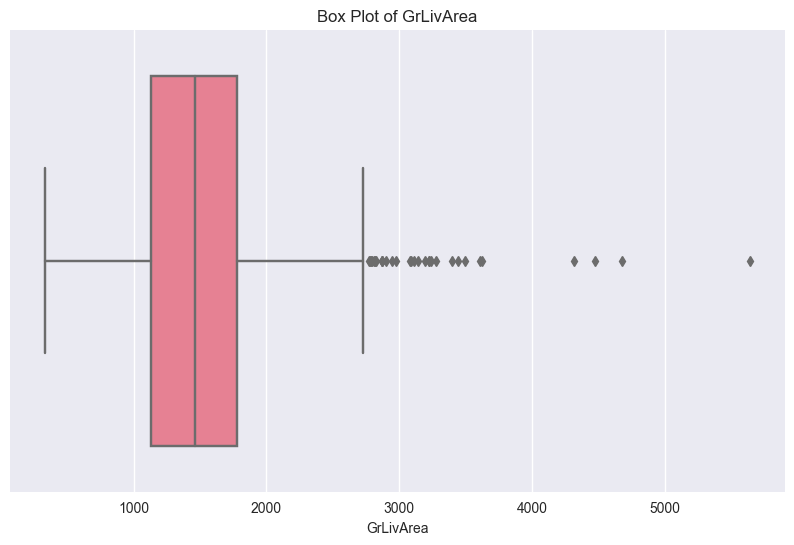


Outlier Analysis for GrLivArea:
Number of outliers: 31
Percentage of outliers: 2.12%
Outlier boundaries: [158.62, 2747.62]

Outlier values:
1298    5642
523     4676
1182    4476
691     4316
1169    3627
185     3608
304     3493
1268    3447
635     3395
769     3279
1353    3238
496     3228
118     3222
608     3194
798     3140
197     3112
1173    3086
1031    3082
324     2978
58      2945
1024    2898
961     2872
1175    2872
1046    2868
1142    2828
803     2822
1312    2810
231     2794
1328    2792
1386    2784
583     2775
Name: GrLivArea, dtype: int64


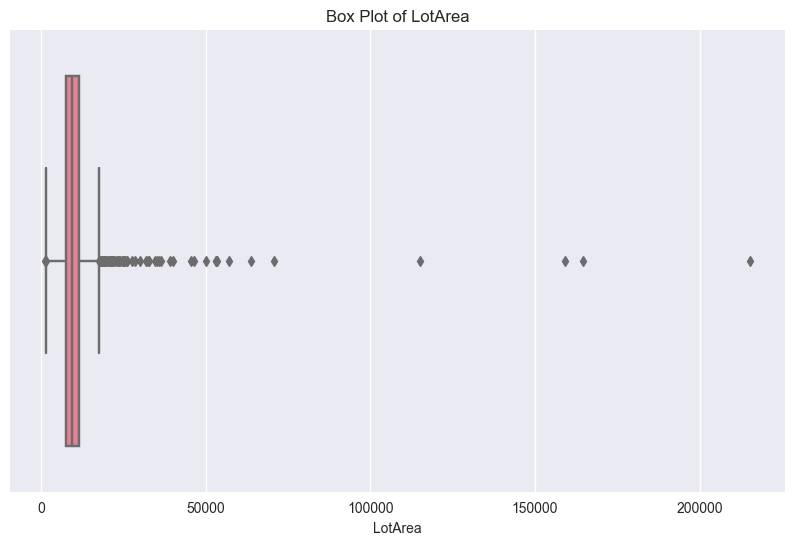


Outlier Analysis for LotArea:
Number of outliers: 69
Percentage of outliers: 4.73%
Outlier boundaries: [1481.50, 17673.50]

Outlier values:
313     215245
335     164660
249     159000
706     115149
451      70761
1298     63887
1396     57200
769      53504
457      53227
384      53107
53       50271
661      46589
848      45600
523      40094
271      39104
1287     36500
1169     35760
1184     35133
411      34650
529      32668
1190     32463
171      31770
1057     29959
828      28698
934      27650
692      26178
1446     26142
197      25419
1383     25339
876      25286
588      25095
943      25000
1260     24682
939      24090
1270     23595
1107     23257
185      22950
417      22420
1430     21930
558      21872
563      21780
422      21750
1048     21750
726      21695
691      21535
120      21453
807      21384
1010     21286
113      21000
664      20896
1346     20781
1409     20544
349      20431
66       19900
1423     19690
159      19378
260      19296
277 

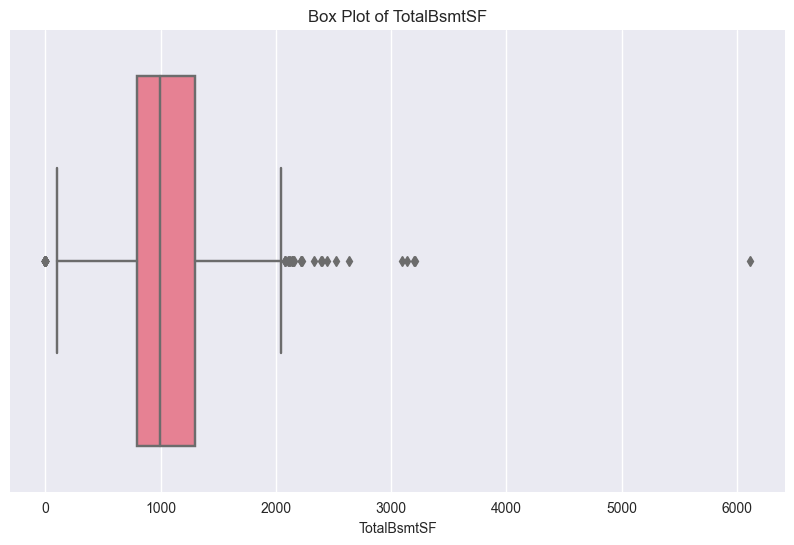


Outlier Analysis for TotalBsmtSF:
Number of outliers: 61
Percentage of outliers: 4.18%
Outlier boundaries: [42.00, 2052.00]

Outlier values:
1298    6110
332     3206
496     3200
523     3138
440     3094
1373    2633
1044    2524
691     2444
1182    2396
224     2392
898     2330
70      2223
888     2217
178     2216
1205    2158
477     2153
313     2136
1223    2136
278     2121
1250    2110
654     2109
825     2078
664     2077
1243    2076
1011       0
1048       0
1000       0
1035       0
1045       0
17         0
1049       0
1090       0
1179       0
1216       0
1218       0
1232       0
1321       0
984        0
736        0
897        0
894        0
90         0
102        0
156        0
182        0
259        0
342        0
362        0
371        0
392        0
520        0
532        0
533        0
553        0
646        0
705        0
39         0
749        0
778        0
868        0
1412       0
Name: TotalBsmtSF, dtype: int64


In [12]:
def plot_boxplot_with_outliers(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
    
    # Calculate outlier boundaries
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    print(f"\nOutlier Analysis for {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    print(f"Outlier boundaries: [{lower_bound:.2f}, {upper_bound:.2f}]")
    if len(outliers) > 0:
        print("\nOutlier values:")
        print(outliers.sort_values(ascending=False))

# Analyze outliers for important numerical features
important_features = ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']
for feature in important_features:
    if feature in df.columns:
        plot_boxplot_with_outliers(df, feature)

## 8. Year-based Analysis

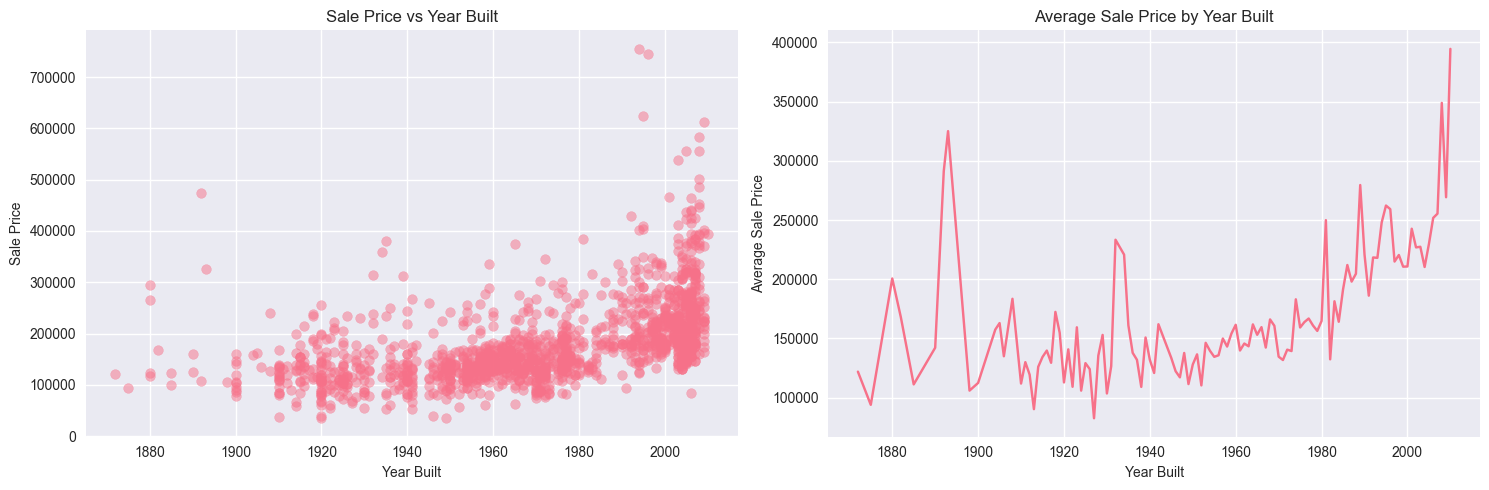


Sale Price Statistics by Decade:
        count           mean            std     min     max
Decade                                                     
1870        2  108000.000000   19798.989873   94000  122000
1880        7  170425.571429   78388.137563  100000  295000
1890        6  216316.666667  151211.843672  106000  475000
1900       15  129828.400000   41345.950724   79000  240000
1910       58  131511.482759   39344.221975   37900  239000
1920       97  123268.350515   44179.012945   34900  256000
1930       54  144415.833333   71533.766293   52000  381000
1940       79  126887.481013   43346.752243   35311  266500
1950      167  140935.670659   39321.976693   55993  335000
1960      175  153852.640000   37612.696342   62383  375000
1970      188  152828.335106   47697.809859   75000  345000
1980       61  190080.327869   58355.282022  112000  385000
1990      163  228404.220859   90930.535654   93500  755000
2000      387  242046.416021   82614.275164   84500  611657
2010  

In [13]:
# Analyze price trends over years
plt.figure(figsize=(15, 5))

# Sale Price vs YearBuilt
plt.subplot(1, 2, 1)
plt.scatter(df['YearBuilt'], df['SalePrice'], alpha=0.5)
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Year Built')

# Average price by year built
avg_price_by_year = df.groupby('YearBuilt')['SalePrice'].mean()
plt.subplot(1, 2, 2)
avg_price_by_year.plot()
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Year Built')

plt.tight_layout()
plt.show()

# Print summary statistics by decade
df['Decade'] = (df['YearBuilt'] // 10) * 10
decade_stats = df.groupby('Decade')['SalePrice'].agg(['count', 'mean', 'std', 'min', 'max'])
print("\nSale Price Statistics by Decade:")
print(decade_stats) 